In [131]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler
import dataframe_image as dfi
from sklearn.preprocessing import Normalizer


#### Tratamento dos dados

In [2]:
live = pd.read_csv('live.csv', sep=",", na_values=['?'])  
# Count total NaN at each column in a DataFrame
print(" \nCount total NaN at each column in a DataFrame : \n\n",
      live.isnull().sum())

 
Count total NaN at each column in a DataFrame : 

 status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64


In [4]:
live.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   int64  
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(10), object(2)
memory

In [41]:


live = pd.read_csv('live.csv', sep=",", na_values=['?'])  

live2 = live.drop(['Column1', 'Column2','Column3' ,'Column4', "status_id", "status_published"], axis=1)

live2["status_type"] = live2.status_type.map({
    'video': 0,
    'photo': 1,
    'link': 2,
    'status': 3,
    
})

live2.to_csv("live-clean.csv",sep=",",index=False)


In [8]:
live_clean = pd.read_csv('live-clean.csv', sep=",")
live_clean.describe()

describe = live_clean.describe()
dfi.export(describe, "fig10.png")


In [10]:
live_clean = pd.read_csv('live-clean.csv', sep=",")
live_clean.head()

describe = live_clean.head()
dfi.export(describe, "fig11.png")


## Execução do Experimento (KMeans)

#### Variação do Número de grupos e Atributos

###### Comentário versus Likes, K = [2, 3, 4, 5, 6, 7]

In [73]:

def do_plot(k, dataset, atributes, axes):
    kmeans = KMeans(n_clusters=k, random_state=0)
    dataset['cluster'] = kmeans.fit_predict(dataset[[atributes[0], atributes[1]]])
    centroids = kmeans.cluster_centers_
    cen_x = [i[0] for i in centroids] 
    cen_y = [i[1] for i in centroids]
    dataset['cen_x'] = dataset.cluster.map({ i : cen_x[i] for i in range(0, k)})
    dataset['cen_y'] = dataset.cluster.map({ i : cen_x[i] for i in range(0, k)})
    colors = ['blue','red', 'black', 'green', 'orange','pink', 'lime', 'teal','brown','navy']
    dataset['c'] = dataset.cluster.map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3], 4:colors[4], 5:colors[5], 6:colors[6]})
    dataset.plot(ax=axes, x=atributes[0], y=atributes[1], kind='scatter', color=dataset['c'], figsize=(10,8),
                     title='(k = {})'.format(k))


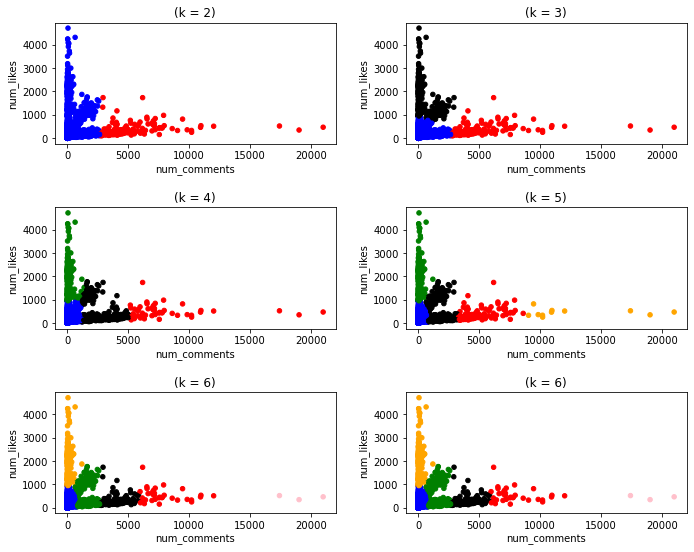

In [77]:
live_clean = pd.read_csv('live-clean.csv', sep=",")
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.tight_layout()

do_plot(2, live_clean, ["num_comments", "num_likes"], axes[0,0])
do_plot(3, live_clean, ["num_comments", "num_likes"], axes[0,1])
do_plot(4, live_clean, ["num_comments", "num_likes"], axes[1,0])
do_plot(5, live_clean, ["num_comments", "num_likes"], axes[1,1])
do_plot(6, live_clean, ["num_comments", "num_likes"], axes[2,0])
do_plot(6, live_clean, ["num_comments", "num_likes"], axes[2,1])

fig.savefig('fig17.png')

###### Comentário versus Shares, K = [2, 3, 4, 5, 6, 7]

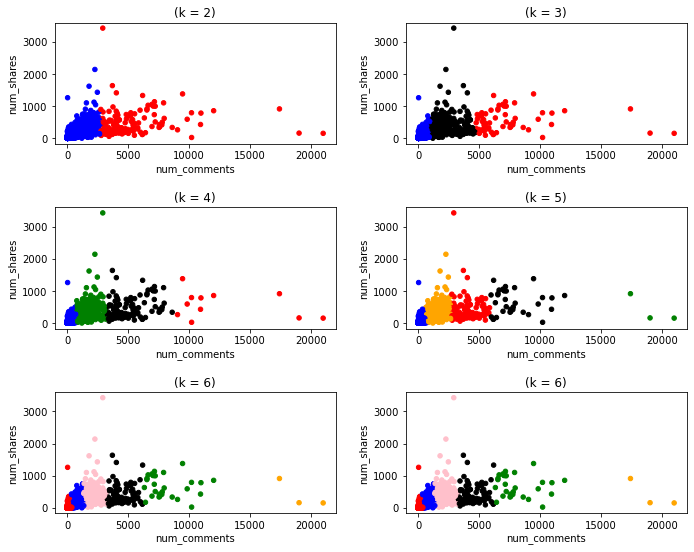

In [80]:
live_clean = pd.read_csv('live-clean.csv', sep=",")
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.tight_layout()

do_plot(2, live_clean, ["num_comments", "num_shares"], axes[0,0])
do_plot(3, live_clean, ["num_comments", "num_shares"], axes[0,1])
do_plot(4, live_clean, ["num_comments", "num_shares"], axes[1,0])
do_plot(5, live_clean, ["num_comments", "num_shares"], axes[1,1])
do_plot(6, live_clean, ["num_comments", "num_shares"], axes[2,0])
do_plot(6, live_clean, ["num_comments", "num_shares"], axes[2,1])

fig.savefig('fig18.png')

###### Shares versus Likes, K = 5

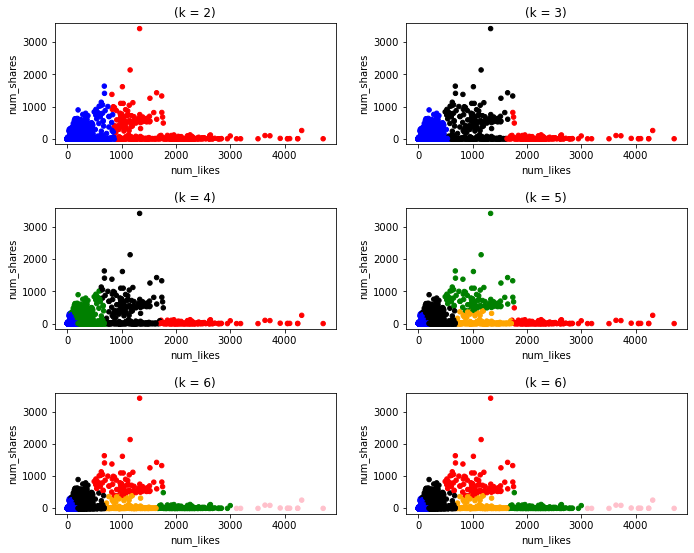

In [81]:
live_clean = pd.read_csv('live-clean.csv', sep=",")
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.tight_layout()

do_plot(2, live_clean, ["num_likes", "num_shares"], axes[0,0])
do_plot(3, live_clean, ["num_likes", "num_shares"], axes[0,1])
do_plot(4, live_clean, ["num_likes", "num_shares"], axes[1,0])
do_plot(5, live_clean, ["num_likes", "num_shares"], axes[1,1])
do_plot(6, live_clean, ["num_likes", "num_shares"], axes[2,0])
do_plot(6, live_clean, ["num_likes", "num_shares"], axes[2,1])

fig.savefig('fig19.png')

###### Likes versus Loves, K = [2, 3, 4, 5, 6, 7]

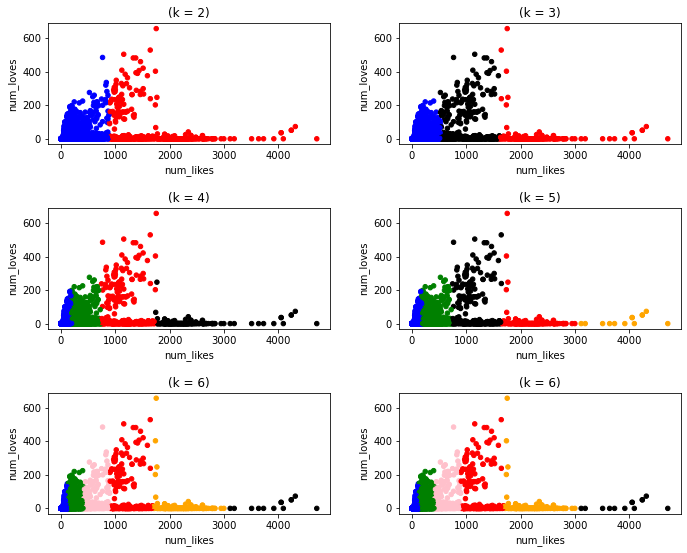

In [82]:
live_clean = pd.read_csv('live-clean.csv', sep=",")
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.tight_layout()

do_plot(2, live_clean, ["num_likes", "num_loves"], axes[0,0])
do_plot(3, live_clean, ["num_likes", "num_loves"], axes[0,1])
do_plot(4, live_clean, ["num_likes", "num_loves"], axes[1,0])
do_plot(5, live_clean, ["num_likes", "num_loves"], axes[1,1])
do_plot(6, live_clean, ["num_likes", "num_loves"], axes[2,0])
do_plot(6, live_clean, ["num_likes", "num_loves"], axes[2,1])

fig.savefig('fig20.png')

#### Análise do Cotovelo e Silhueta - "num_comments", "num_likes"

For n_clusters=2, the silhouette score is 0.8443788785306117
For n_clusters=3, the silhouette score is 0.80232454770455
For n_clusters=4, the silhouette score is 0.8117125114541782
For n_clusters=5, the silhouette score is 0.6585309045940433
For n_clusters=6, the silhouette score is 0.6591436535821841
For n_clusters=7, the silhouette score is 0.6644622216349229
For n_clusters=8, the silhouette score is 0.6955902112522254
For n_clusters=9, the silhouette score is 0.6305503968757529
For n_clusters=10, the silhouette score is 0.6555331891357375


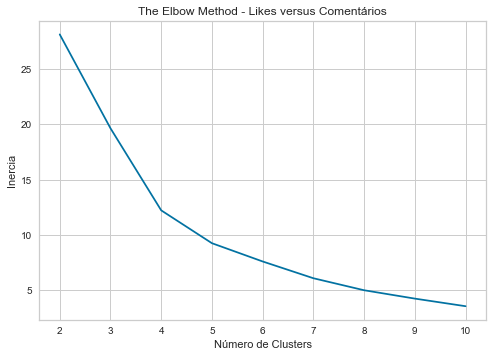

In [175]:

data = pd.read_csv('live-clean.csv', sep=",")

live_clean = data[["num_comments", "num_likes"]]


ms = MinMaxScaler()

X = ms.fit_transform(live_clean)

cs = []
r = 11
for i in range(2, r):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 7)

    kmeans.fit(X)
    
    cluster_labels = kmeans.labels_
    
    cs.append(kmeans.inertia_)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters={}, the silhouette score is {}".format(i, silhouette_avg))
# plot the 
plt.plot(range(2, r), cs )
plt.title('The Elbow Method - Likes versus Comentários')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.savefig('fig21.png')
plt.show()


For n_clusters = 2 The average silhouette_score is : 0.9345012212339187


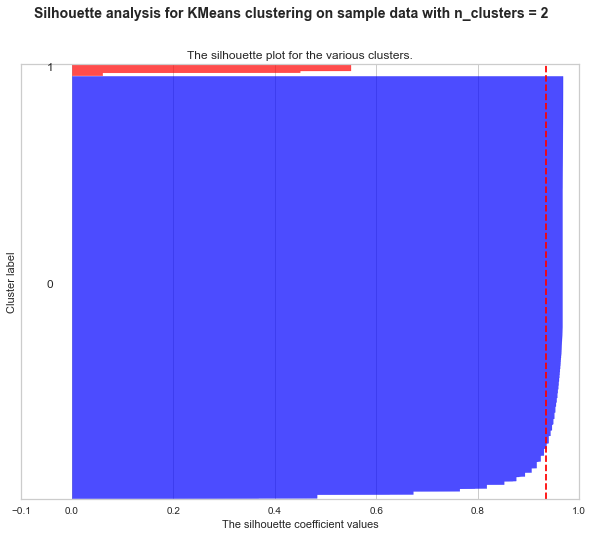

{0: 6876, 1: 174}

In [174]:
def plot_silhouette(X, n_clusters, cluster_labels):


        # Create a subplot with 1 row and 2 columns
        
        fig, (ax1) = plt.subplots(1, 1)
        
        fig.set_size_inches(10, 8)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                color=get_color(i),
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

        plt.show()
        
        
# data = pd.read_csv('live-clean.csv', sep=",")
# dataset = data[["num_comments", "num_likes"]]

# df_aux = dataset
# X = Normalizer().fit_transform(df_aux.values)

k = 2
data = pd.read_csv('live-clean.csv', sep=",")

live_clean = data[["num_likes", "num_loves"]]

X = Normalizer().fit_transform(live_clean.values)


kmeans = KMeans(n_clusters=k)#.fit(X)
dataset['cluster'] = kmeans.fit_predict(X)

colors = ['blue','red', 'black', 'green', 'orange','pink', 'lime', 'teal','brown','navy']


#dataset['c'] = dataset.cluster.map({0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3], 4:colors[4], 5:colors[5], 6:colors[6]})
cluster_labels = kmeans.labels_

plot_silhouette(X, k, cluster_labels)





import numpy
unique, counts = numpy.unique(cluster_labels, return_counts=True)
dict(zip(unique, counts))

# {0: 7, 1: 4, 2: 1, 3: 2, 4: 1}

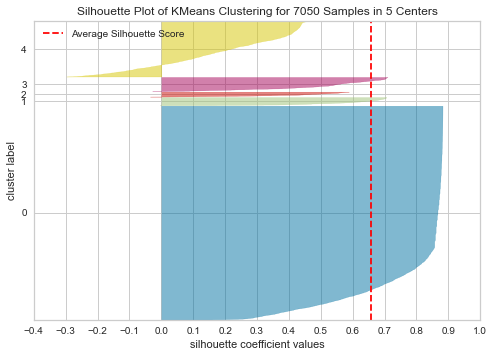

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 7050 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [170]:
from yellowbrick.cluster import SilhouetteVisualizer

#fig, ax = plt.subplots(2, 2, figsize=(15,8))


data = pd.read_csv('live-clean.csv', sep=",")

live_clean = data[["num_comments", "num_likes"]]



X = Normalizer().fit_transform(live_clean.values)

X = ms.fit_transform(live_clean)

from yellowbrick.cluster import SilhouetteVisualizer

model = KMeans(5, random_state=42)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show()  

### Questão 3

In [62]:
live_clean


,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,0,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,0,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7045,1,89,0,0,89,0,0,0,0,0
7046,1,16,0,0,14,1,0,1,0,0
7047,1,2,0,0,1,1,0,0,0,0
7048,1,351,12,22,349,2,0,0,0,0


In [58]:
X = live_clean[['num_likes',"num_loves"]]
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[ 0.48272661,  1.98326643],
       [-0.14472021, -0.3184544 ],
       [-0.02457082,  0.2069384 ],
       ...,
       [-0.47624353, -0.29343569],
       [ 0.29805255, -0.26841699],
       [-0.44064371, -0.3184544 ]])

In [64]:
live_clean

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,0,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,0,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7045,1,89,0,0,89,0,0,0,0,0
7046,1,16,0,0,14,1,0,1,0,0
7047,1,2,0,0,1,1,0,0,0,0
7048,1,351,12,22,349,2,0,0,0,0


In [1]:
# númro de comenta


ms = MinMaxScaler()

X = ms.fit_transform(live_clean)

dendrograma = dendrogram(linkage(X, method = 'ward'))
plt.title('Dendrograma')
plt.xlabel('Pessoas')
plt.ylabel('Distância Euclidiana')
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean')
previsoes = hc.fit_predict(X)

NameError: name 'MinMaxScaler' is not defined

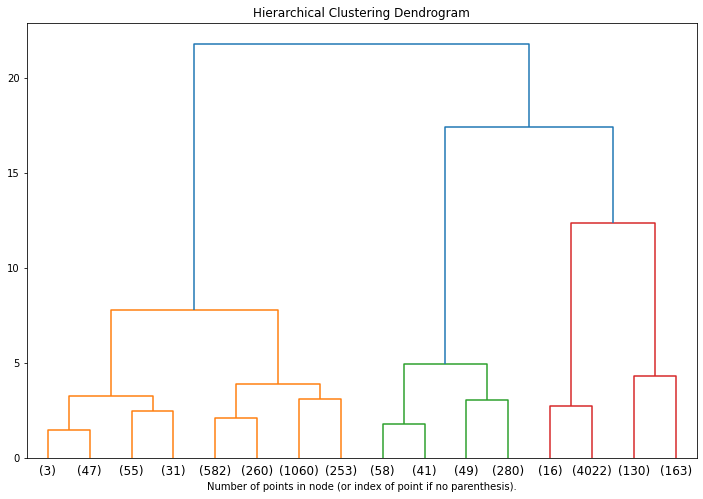

In [13]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

ms = MinMaxScaler()

X = ms.fit_transform(live_clean)

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.figure(figsize=(12,8))
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()